In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./house_price.csv')

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

- Log transformation = np.log(each value in column)
- Reciprocal transformation = 1/ each value in column
- square root transformation =square root( each value)
- Exponential transformation= e** column value
- box cox transformation= check formula
- yeo -johnson transformation = check formula

In [40]:
import scipy
import scipy.stats as stats

In [41]:
def transformation(df,var):
    plt.figure(figsize = (10,3))
    plt.subplot(1,3,1)
    plt.hist(df[var],bins =50)
    plt.subplot(1,3,2)
    sns.distplot(df[var])
    plt.subplot(1,3,3)
    stats.probplot(df[var],plot = plt)
    plt.show()
    

In [42]:
import warnings 
warnings.filterwarnings('ignore')

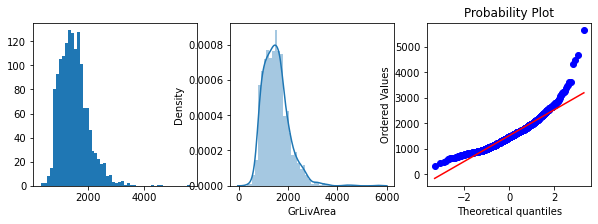

In [43]:
transformation(df,'GrLivArea')

## LOg technique

In [44]:
df['GrLiveArea_log'] =np.log(df['GrLivArea'])

In [45]:
df['GrLiveArea_log']

0       7.444249
1       7.140453
2       7.487734
3       7.448334
4       7.695303
          ...   
1455    7.406711
1456    7.636752
1457    7.757906
1458    6.982863
1459    7.135687
Name: GrLiveArea_log, Length: 1460, dtype: float64

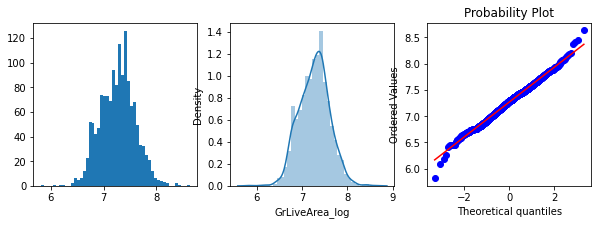

In [46]:
transformation(df,'GrLiveArea_log')

## Reciprocal

In [49]:
df['GrLivArea_reci'] = 1 /df['GrLivArea']

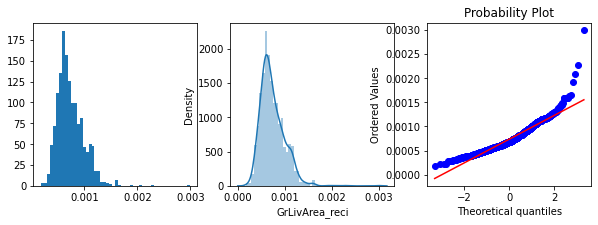

In [50]:
transformation(df,'GrLivArea_reci')

## square root

In [52]:
df['GrLivArea_sqrt'] = np.sqrt(df['GrLivArea'])

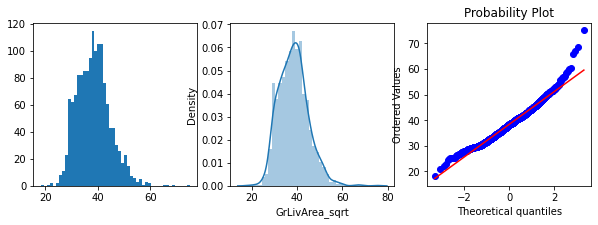

In [53]:
transformation(df,'GrLivArea_sqrt')

## Exponential 

In [54]:
np.exp(4)

54.598150033144236

In [59]:
df['GrLivArea_exp'] = (df['GrLivArea']) ** 1/1.5

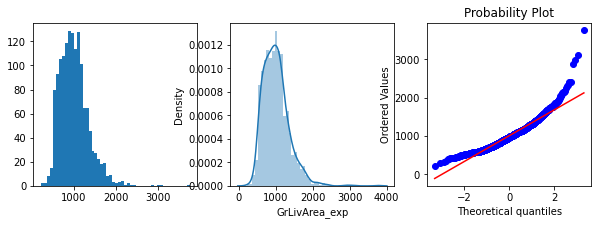

In [60]:
transformation(df,'GrLivArea_exp')

## box cox technique

In [61]:
df['GrLivArea_boxcox'],alpha = stats.boxcox(df['GrLivArea'])

In [62]:
alpha

0.006304924353543215

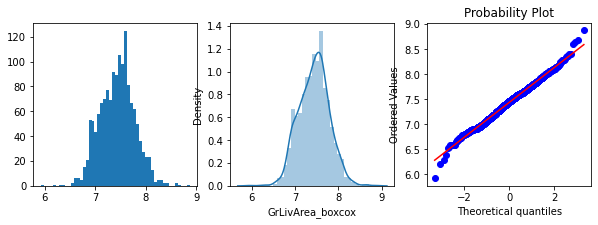

In [63]:
transformation(df,'GrLivArea_boxcox')

## yoe -johnson

In [64]:
df['GrLivArea -yoe-johnson'], alpha = stats.yeojohnson(df['GrLivArea'])

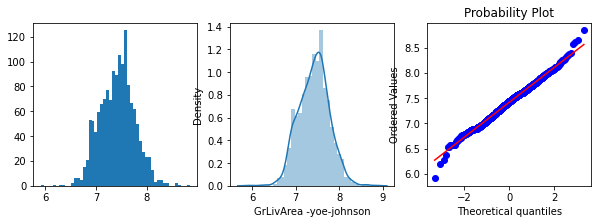

In [66]:
transformation(df,'GrLivArea -yoe-johnson')